# * Kurapati Venkatesh

# * 09012021

# * Topic: Neural Network - ANN ✨🧠🕸

# ---------------------------------------------------------------------------

## Problem Statement:

## WE have Dataset which contains the details of 50 startup’s . Predicts the profit of a new Startup based on certain features. To Venture Capitalists this could be a boon as to whether they should invest in a particular Startup or not. So Build a Neural Network model to predict profit and which startup’s end up performing better. By seeing that if they spent more money on marketing or was it their stellar R&D department which led them to this huge profit and in turn huge fame and success.

## -----------------------------------------------------------------------------------

### Problem Objective:
##### To Build a Neural Network model to predict profit and which startup’s end up performing better.

## -------------------------------------------------------------------------------------------

## 1. Importing libraries:

In [33]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 2. Loading Dataset and checking information:

In [34]:
df = pd.read_csv(r"G:\360digit\assignments meterial\ANN\50_Startups (2).csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [35]:
#shape of our dataset
df.shape

(50, 5)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [37]:
#checking for missing data
df.isnull().sum()
#there is no missing value in the data

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [38]:
df.describe(include="all")

,R&D Spend,Administration,Marketing Spend,State,Profit
count,50.000000,50.000000,50.000000,50,50.000000
unique,NaN,NaN,NaN,3,NaN
top,NaN,NaN,NaN,California,NaN
freq,NaN,NaN,NaN,17,NaN
mean,73721.615600,121344.639600,211025.097800,NaN,112012.639200
std,45902.256482,28017.802755,122290.310726,NaN,40306.180338
min,0.000000,51283.140000,0.000000,NaN,14681.400000
25%,39936.370000,103730.875000,129300.132500,NaN,90138.902500
50%,73051.080000,122699.795000,212716.240000,NaN,107978.190000
75%,101602.800000,144842.180000,299469.085000,NaN,139765.977500


## 3. Visualising Dataset:

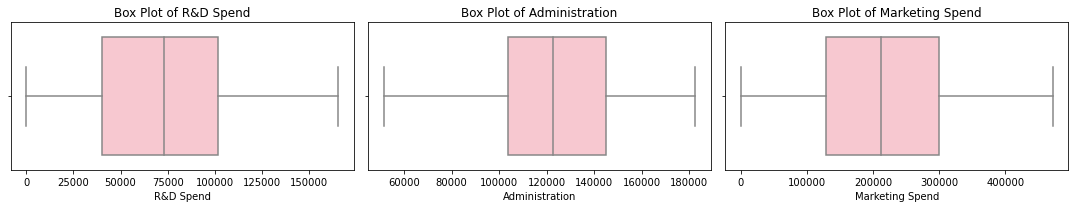

In [39]:
#Box Plot of independent variables an it seems we dont have outliers in our independent varables
plt.figure(figsize=(20,3))
for i,col in zip(range(1,4),df.columns):
    plt.subplot(1,4,i)
    sns.boxplot(x=col,data=df,color='pink')
    plt.title(f"Box Plot of {col}")
    plt.tight_layout()

C:\Users\Hp\anaconda3\envs\digit\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Hp\anaconda3\envs\digit\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Hp\anaconda3\envs\digit\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or

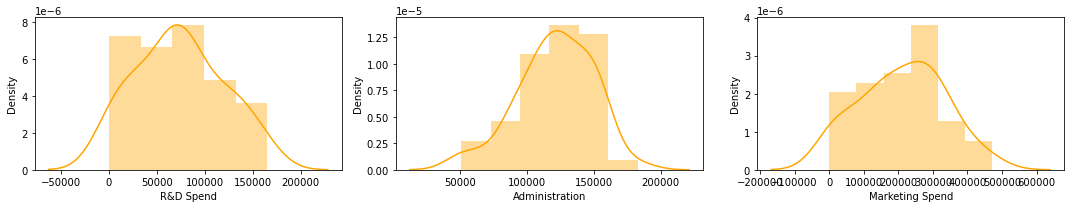

In [40]:
#Distribution Plot of independent variables an it seems  all variables are Normally distributed.
plt.figure(figsize=(20,3))
for i,col in zip(range(1,4),df.columns):
    plt.subplot(1,4,i)
    sns.distplot(a=df[col],color='orange')
    plt.tight_layout()

C:\Users\Hp\anaconda3\envs\digit\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Hp\anaconda3\envs\digit\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


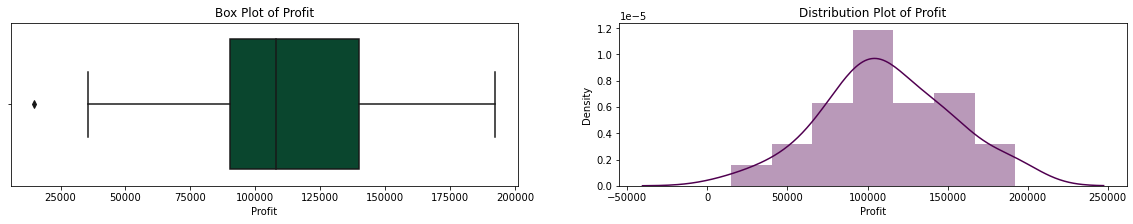

In [41]:
#Box Plot and Distribution Plot for Dependent variable PROFIT
plt.figure(figsize=(20,3))

plt.subplot(1,2,1)
sns.boxplot(df.Profit,color='#005030')
plt.title('Box Plot of Profit')

plt.subplot(1,2,2)
sns.distplot(a=df.Profit,color='#500050')
plt.title('Distribution Plot of Profit')
plt.show()

In [42]:
df[df['Profit']<25000]

,R&D Spend,Administration,Marketing Spend,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


* This is the outlier, since we see the R&D is higly correlated to the Proft
* Here R&D spend is zero so its obious the profit is very low for this startup

In [43]:
df[df['R&D Spend']<10000]

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


- After observing above few startup data, We can say that for Index 49 (which is Outlier) there is some error in Profit
- typo error maybe. Sonce Profit for other startups with very R&D Spend is much higher than this
- We will be removing the outlier from the dataset

In [44]:
df.drop(index=49,axis=0,inplace=True)
df.shape

(49, 5)

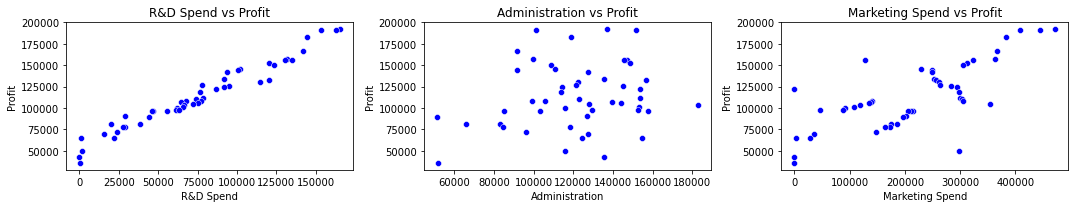

In [45]:
#Distribution Plot of independent variables an it seems  all variables are Normally distributed.
plt.figure(figsize=(20,3))
for i,col in zip(range(1,4),df.columns):
    plt.subplot(1,4,i)
    sns.scatterplot(x=col,y='Profit',data=df,color='blue')
    plt.title(f"{col} vs Profit")
    plt.tight_layout()

<AxesSubplot:title={'center':'Correlation Matrix'}>

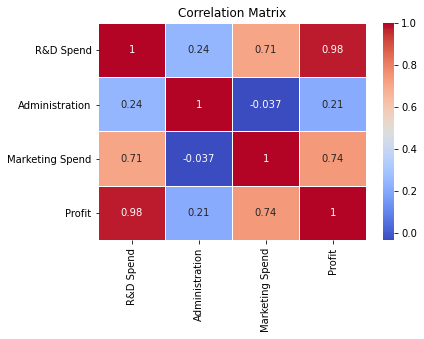

In [46]:
#we can see that R&D is highly linearly correalted with Profit
#let us look at correlation matrix
plt.title("Correlation Matrix")
sns.heatmap(data=df.corr(),annot=True,cmap='coolwarm',linewidths=0.1)

* We can see that R&D Spend and Marketing Spend are 0.98 and 0.75 correlated with Profit which is very high.
* And Adminstration Spend is very less correlated, so we can drop that feature for buliding model.
* Also, we can see that R&D and Marketing are correlated with 0.72 which is high => Multicollinearity in independent variables.

We cannot have Multicollinearity in the dataset

Text(0.5, 1.0, 'R&D Spend vs Marketing Spend')

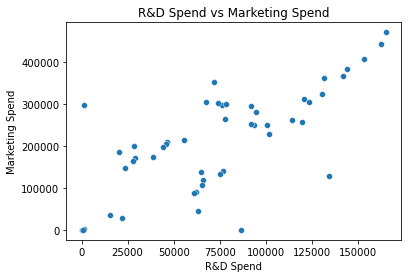

In [47]:
#This shows linear relationship between R&D Spend and Marketing Spend
sns.scatterplot(x='R&D Spend',y='Marketing Spend',data=df)
plt.title("R&D Spend vs Marketing Spend")

In [48]:
df1 = df.copy()
df1.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## 4. Wrangling Dataset:

In [49]:
x=df1.iloc[:,0:4]
x.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [50]:
y=df1.iloc[:,4:5]
y.head()

,Profit
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


### Performing Label Encoding:

In [51]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [52]:
x['State']=le.fit_transform(x['State'])
x.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,2
1,162597.70,151377.59,443898.53,0
2,153441.51,101145.55,407934.54,1
3,144372.41,118671.85,383199.62,2
4,142107.34,91391.77,366168.42,1


In [53]:
x.shape

(49, 4)

# 5. Model:

### Performing Sequential Operations

In [54]:
from keras.layers.core import Dense
from numpy import loadtxt
from keras.models import Sequential

In [55]:
model=Sequential()
model.add(Dense(12,input_dim=4,kernel_initializer='normal',activation='relu'))
model.add(Dense(8,kernel_initializer='normal',activation='relu'))
model.add(Dense(1,kernel_initializer='normal'))

In [56]:
model.compile(loss='mean_squared_error',optimizer='adam')

In [57]:
model

### Fitting the Model:

In [58]:
model.fit(x,y,epochs=500,batch_size=10)

Epoch 1/500
5/5 [==============================] - 0s 1ms/step - loss: 14413907968.0000
Epoch 2/500
5/5 [==============================] - 0s 1ms/step - loss: 14387870720.0000
Epoch 3/500
5/5 [==============================] - 0s 1ms/step - loss: 14367595520.0000
Epoch 4/500
5/5 [==============================] - 0s 2ms/step - loss: 14345023488.0000
Epoch 5/500
5/5 [==============================] - 0s 1ms/step - loss: 14312441856.0000
Epoch 6/500
5/5 [==============================] - 0s 1ms/step - loss: 14263504896.0000
Epoch 7/500
5/5 [==============================] - 0s 2ms/step - loss: 14201131008.0000
Epoch 8/500
5/5 [==============================] - 0s 2ms/step - loss: 14119513088.0000
Epoch 9/500
5/5 [==============================] - 0s 999us/step - loss: 14005441536.0000
Epoch 10/500
5/5 [==============================] - 0s 2ms/step - loss: 13855180800.0000
Epoch 11/500
5/5 [==============================] - 0s 2ms/step - loss: 13665914880.0000
Epoch 12/500
5/5 [==========

5/5 [==============================] - 0s 1ms/step - loss: 215111152.0000
Epoch 187/500
5/5 [==============================] - 0s 997us/step - loss: 214263424.0000
Epoch 188/500
5/5 [==============================] - 0s 2ms/step - loss: 212718320.0000
Epoch 189/500
5/5 [==============================] - 0s 1ms/step - loss: 212179072.0000
Epoch 190/500
5/5 [==============================] - 0s 1ms/step - loss: 211436976.0000
Epoch 191/500
5/5 [==============================] - 0s 1000us/step - loss: 210766864.0000
Epoch 192/500
5/5 [==============================] - 0s 1ms/step - loss: 209827376.0000
Epoch 193/500
5/5 [==============================] - 0s 1ms/step - loss: 209155216.0000
Epoch 194/500
5/5 [==============================] - 0s 1ms/step - loss: 208076640.0000
Epoch 195/500
5/5 [==============================] - 0s 1000us/step - loss: 208579168.0000
Epoch 196/500
5/5 [==============================] - 0s 1ms/step - loss: 207504816.0000
Epoch 197/500
5/5 [===================

5/5 [==============================] - 0s 1ms/step - loss: 165935360.0000
Epoch 371/500
5/5 [==============================] - 0s 1ms/step - loss: 166308256.0000
Epoch 372/500
5/5 [==============================] - 0s 2ms/step - loss: 165862640.0000
Epoch 373/500
5/5 [==============================] - 0s 999us/step - loss: 165667952.0000
Epoch 374/500
5/5 [==============================] - 0s 1ms/step - loss: 166591200.0000
Epoch 375/500
5/5 [==============================] - 0s 1ms/step - loss: 166751872.0000
Epoch 376/500
5/5 [==============================] - 0s 1ms/step - loss: 165602336.0000
Epoch 377/500
5/5 [==============================] - 0s 1ms/step - loss: 165771104.0000
Epoch 378/500
5/5 [==============================] - 0s 2ms/step - loss: 166161968.0000
Epoch 379/500
5/5 [==============================] - 0s 1ms/step - loss: 165461152.0000
Epoch 380/500
5/5 [==============================] - 0s 999us/step - loss: 165604944.0000
Epoch 381/500
5/5 [=======================

5/5 [==============================] - 0s 2ms/step - loss: 165324784.0000
Epoch 464/500
5/5 [==============================] - 0s 1ms/step - loss: 165266624.0000
Epoch 465/500
5/5 [==============================] - 0s 800us/step - loss: 165920336.0000
Epoch 466/500
5/5 [==============================] - 0s 1ms/step - loss: 165341296.0000
Epoch 467/500
5/5 [==============================] - 0s 1ms/step - loss: 166239296.0000
Epoch 468/500
5/5 [==============================] - 0s 1ms/step - loss: 166560240.0000
Epoch 469/500
5/5 [==============================] - 0s 1ms/step - loss: 165052304.0000
Epoch 470/500
5/5 [==============================] - 0s 1ms/step - loss: 165569504.0000
Epoch 471/500
5/5 [==============================] - 0s 800us/step - loss: 164936336.0000
Epoch 472/500
5/5 [==============================] - 0s 1ms/step - loss: 166280480.0000
Epoch 473/500
5/5 [==============================] - 0s 1ms/step - loss: 165173440.0000
Epoch 474/500
5/5 [=======================

### Predicting the output:

In [61]:
y_pred=model.predict(x)
y_pred

array([[200952.34 ],
       [201724.05 ],
       [175089.31 ],
       [172788.1  ],
       [160408.14 ],
       [155935.9  ],
       [154720.56 ],
       [167366.48 ],
       [160680.11 ],
       [148273.7  ],
       [127795.73 ],
       [122156.695],
       [129680.375],
       [131430.53 ],
       [158405.16 ],
       [143388.9  ],
       [117904.195],
       [139056.1  ],
       [127410.68 ],
       [112883.49 ],
       [116856.875],
       [132178.5  ],
       [118745.82 ],
       [108512.   ],
       [ 99312.07 ],
       [104376.01 ],
       [113034.98 ],
       [123310.03 ],
       [118548.01 ],
       [107126.27 ],
       [ 90413.25 ],
       [102346.06 ],
       [ 92348.32 ],
       [ 91775.65 ],
       [103986.84 ],
       [ 78237.086],
       [ 80302.57 ],
       [ 64551.402],
       [ 52083.746],
       [ 69825.49 ],
       [ 75090.414],
       [ 62147.777],
       [ 61788.598],
       [ 57591.945],
       [ 71074.914],
       [ 43629.86 ],
       [ 65381.32 ],
       [ 4666

In [ ]:
y.shape

In [ ]:
y_pred.shape

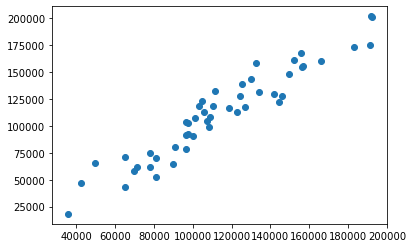

In [60]:
plt.scatter(y,y_pred)